#LECTURA Y ESCRITURA DE ARCHIVOS Y VISUALIZACIÓN
1. Series
2. DataFrames
3. Lectura de archivos
4. Escritura de archivos
5. Visualización
6. Fundamentos de Machine Learning

In [1]:
# pd y np son los alias más empleados para estas 2 librerías

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Series
Las Series son arreglos unidimensionales cuyos elementos están identificados por un índice, este índice puede ser numérico o una etiqueta. La serie está conformada por dos arreglos de numpy, uno aloja los valores y otro los índices para cada valor. Las series pueden ser creadas usando la función `pd.Series`. Está función admite varios tipos de datos como argumentos.
* Listas o tuplas
* Diccionarios
* Arreglos de numpy

###Atributos de las Series
Veremos algunos atributos para ambos tipos de objetos, algunos de ellos son heredados de Numpy. Recuerde que la librería Pandas está escrita sobre Numpy.

Para acceder a un atributo se usa el símbolo `.`

Iniciemos con diferentes métodos válidos para **Series**. Para consultar todos los atributos y métodos disponibles consulte [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [ ]:
#Creación de una lista llamada ciudades y su transformación a Serie.

ciudades= ['Bogotá', 'Medellin', 'Cali', 'Barranquilla']
pd.Series(ciudades)

,0
0,Bogotá
1,Medellin
2,Cali
3,Barranquilla


In [ ]:
ciudades

['Bogotá', 'Medellin', 'Cali', 'Barranquilla']

In [ ]:
#Creación de un Diccionario llamada ciudades

ciudades= {
    'Bogotá': 8000000,
    'Medellin': 6000000,
    'Cali': 4000000,
    'Barranquilla': 5000000}

In [ ]:
#Conversión del diccionario llamado ciudades en una Serie almacenándola en habitantes.

habitantes= pd.Series(ciudades, name='nombre')
habitantes

,nombre
Bogotá,8000000
Medellin,6000000
Cali,4000000
Barranquilla,5000000


In [ ]:
#Creación de un Diccionario llamada ciudades

ciudades= {
    'Bogotá': 8000000,
    'Medellin': 6000000,
    'Cali': 4000000,
    'Barranquilla': 5000000}

In [ ]:
datos= {
    'nombre_ciudad': ['Bogotá', 'Medellin', 'Cali', 'Barranquilla'],
    'poblacion': (113440000, 22229777, 2078766, 3799887),
    'altura': np.array([26400, 1018, 1495, 18])
    }

In [ ]:
habitantes_ciudad = pd.Series(datos, name='poblacion') # diccionario
habitantes_ciudad

,poblacion
nombre_ciudad,"[Bogotá, Medellin, Cali, Barranquilla]"
poblacion,"(113440000, 22229777, 2078766, 3799887)"
altura,"[26400, 1018, 1495, 18]"


In [ ]:
# Importante siempre reconocer con qué objeto estamos tratando

type(habitantes_ciudad)

pandas.core.series.Series

In [ ]:
# Extraer los valores de la Serie
habitantes_ciudad.values

array([list(['Bogotá', 'Medellin', 'Cali', 'Barranquilla']),
       (113440000, 22229777, 2078766, 3799887),
       array([26400,  1018,  1495,    18])], dtype=object)

In [ ]:
# Extraer el índice de la Serie

habitantes_ciudad.index

Index(['nombre_ciudad', 'poblacion', 'altura'], dtype='object')

In [ ]:
# Extraer el nombre de la Serie

habitantes_ciudad.name

'poblacion'

In [ ]:
# Extraer el número de elementos del arreglo de numpy dentro de la Serie
habitantes_ciudad.size

3

In [ ]:
# Retorna una tupla con el tamaño de las dimensiones del arreglo de Numpy dentro de la Serie (filas,columnas)

habitantes_ciudad.shape

(3,)

In [ ]:
# Retorna la tipología de los valores de la Serie

habitantes_ciudad.dtype

dtype('O')

##2. DataFrame

Los objetos DataFrame son el objeto principal de pandas. Y será dónde vamos a almacenar nuestros datos para analizarlos. Este objeto representa un tabla, cada fila está descrita por un índice y a su vez cada columna es un objeto Series.

Tal cómo hemos visto antes, por convención las columnas son las variables de estudio mientras que las filas son las observaciones del objeto de estudio.

Para crear DataFrames usamos la función `pd.DataFrames` que a su vez recibe varias estructuras de datos como argumentos.

In [ ]:
# Diccionario llamado datos con tres observaciones o registros

datos= {
    'nombre_ciudad': ['Bogotá', 'Medellin', 'Cali', 'Barranquilla'],
    'poblacion': (113440000, 22229777, 2078766, 3799887),
    'altura': np.array([26400.78, 1018.54, 1495.0, 18.33])
    }

In [ ]:
#Convertir un diccionario en un DataFrame

ciudades= pd.DataFrame(datos)
ciudades

,nombre_ciudad,poblacion,altura
0,Bogotá,113440000,26400.78
1,Medellin,22229777,1018.54
2,Cali,2078766,1495.00
3,Barranquilla,3799887,18.33


In [ ]:
type(ciudades)

pandas.core.frame.DataFrame

In [ ]:
ciudades.values

array([['Bogotá', 113440000, 26400],
       ['Medellin', 22229777, 1018],
       ['Cali', 2078766, 1495],
       ['Barranquilla', 3799887, 18]], dtype=object)

In [ ]:
ciudades.keys

<bound method NDFrame.keys of   nombre_ciudad  poblacion  altura
0        Bogotá  113440000   26400
1      Medellin   22229777    1018
2          Cali    2078766    1495
3  Barranquilla    3799887      18>

In [ ]:
ciudades.shape

(4, 3)

In [ ]:
ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nombre_ciudad  4 non-null      object 
 1   poblacion      4 non-null      int64  
 2   altura         4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


In [ ]:
ciudades.columns

Index(['nombre_ciudad', 'poblacion', 'altura'], dtype='object')

In [ ]:
ciudades['nombre_ciudad']

,nombre_ciudad
0,Bogotá
1,Medellin
2,Cali
3,Barranquilla


In [ ]:
type(ciudades['nombre_ciudad'])

pandas.core.series.Series

In [ ]:
ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nombre_ciudad  4 non-null      object
 1   poblacion      4 non-null      int64 
 2   altura         4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [ ]:
ciudades[['nombre_ciudad', 'poblacion', 'altura']]

,nombre_ciudad,poblacion,altura
0,Bogotá,113440000,26400.78
1,Medellin,22229777,1018.54
2,Cali,2078766,1495.00
3,Barranquilla,3799887,18.33


In [ ]:
ciudades.size

12

In [ ]:
ciudades.dtypes

,0
nombre_ciudad,object
poblacion,int64
altura,float64


##Lectura y escritura de archivos

##Lectura de archivos

1. Archivos en excel
2. Archivos en csv
3. Archivos parquet

In [ ]:
df= pd.read_excel('/content/Acciones.xlsx')

In [ ]:
#Listar la primeras cinco filas del DataFrame

df.head()

,Cantidad,Nemotecnico,Volumen,Ultimo_Precio,Variacion%
0,846463,PFBCOLOM,1.974768e+10,24000,6.100796
1,24502418,PFAVAL,1.973486e+10,814,2.132999
2,726655,BCOLOMBIA,1.660450e+10,23980,7.533632
3,8228583,ECOPETROL,1.634702e+10,2005,0.753769
4,306690,GRUPOSURA,5.767559e+09,18840,-1.361257


In [ ]:
df.tail()

,Cantidad,Nemotecnico,Volumen,Ultimo_Precio,Variacion%
28,73700,ETB,14154100.0,192,-3.517588
29,1182300,ENKA,9931320.0,8,0.000000
30,1000,BVC,9220000.0,9220,0.000000
31,4260,ELCONDOR,3838260.0,950,0.000000
32,180,PROMIGAS,1224000.0,6870,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Acciones.csv')

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/ngarciad/UPC/refs/heads/main/iris-Sinnames.data',
                header=None,
                names= ['var1', 'var2', 'var3', 'var4', 'var5'])

##Escritura de archivos
1. Excel
2. csv
3. Parquet

In [ ]:
import datetime
import time


In [ ]:
#Rutas para acceder a los archivos de prueba que se van a leer y a escribir

path_csv= '/content/drive/MyDrive/Colab Notebooks/Allianz/prueba/prueba.csv'
path_excel= '/content/drive/MyDrive/Colab Notebooks/Allianz/prueba/prueba.xlsx'
path_parquet= '/content/drive/MyDrive/Colab Notebooks/Allianz/prueba/prueba.parquet'

In [ ]:
# Medición de los tiempos de escritura
%time df.to_csv(path_csv, index=False)
%time df.to_excel(path_excel, index=False)
%time df.to_parquet(path_parquet)

CPU times: user 3.84 ms, sys: 0 ns, total: 3.84 ms
Wall time: 16.1 ms
CPU times: user 20.8 ms, sys: 1.1 ms, total: 21.9 ms
Wall time: 36.2 ms
CPU times: user 5.45 ms, sys: 0 ns, total: 5.45 ms
Wall time: 19.4 ms


In [ ]:
# Medición de los tiempos de lectura
%time df= pd.read_csv(path_csv)
%time df= pd.read_excel(path_excel)
%time df= pd.read_parquet(path_parquet)

CPU times: user 4.08 ms, sys: 0 ns, total: 4.08 ms
Wall time: 9.25 ms


In [ ]:
#La siguiente instrucción permite crear un archivo de Excel

df.to_excel(path_excel,
                  index=False,
                  sheet_name='Hoja_ejemplo')

In [2]:
#Leer archivos almacenados en Google Drive

housing= pd.read_csv('https://raw.githubusercontent.com/ngarciad/UPC/refs/heads/main/Housing.csv')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing.head() #Muestra las primeras cinco observaciones del DataFrame

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.tail() #Muestra las últimas cinco observaciones del DataFrame

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
type(housing)

pandas.core.frame.DataFrame

In [ ]:
housing.shape

(545, 13)

In [ ]:
housing.describe() #Muestra la estadística descriptiva de las columnas o series númericas

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
housing.describe(include='object') #Muestra la estadística descriptiva de las columnas o series categóricas

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [ ]:
#Muestra la estadística descriptiva de la columna o serie price
print('Media aritmética: ', housing['price'].mean())
print('Valor mínimo: ', housing['price'].min())
print('Valor maximo: ', housing['price'].max())
print('Desviación estandar; ', housing['price'].std())
print('Mediana: ', housing['price'].median())
print('Cuartil 1 (25%): ', housing['price'].quantile(0.25))
print('Cuartil 1 (50%): ', housing['price'].quantile(0.5))
print('Cuartil 1 (75%): ', housing['price'].quantile(0.75))
print('Cuartil 1 (90%): ', housing['price'].quantile(0.90))

Media aritmética:  4766729.247706422
Valor mínimo:  1750000
Valor maximo:  13300000
Desviación estandar;  1870439.615657394
Mediana:  4340000.0
Cuartil 1 (25%):  3430000.0
Cuartil 1 (50%):  4340000.0
Cuartil 1 (75%):  5740000.0
Cuartil 1 (90%):  7350000.0


#Normalización
Normalizar los resultados en el contexto de **value_counts en pandas, significa que en lugar de contar el número absoluto de ocurrencias de cada valor único en una columna, se cuentan las ocurrencias como proporciones del total.

Por ejemplo, si tienes una columna 'bedrooms' con 1000 filas en total en tu DataFrame y hay 200 filas con el valor '2', 300 filas con el valor '3' y 500 filas con el valor '4', el conteo normalizado expresará estos valores como fracciones de 1, representando así la proporción de cada valor en el conjunto de datos. En este caso, el valor '2' tendría una proporción de 0.2 (200/1000), el valor '3' tendría una proporción de 0.3 (300/1000) y el valor '4' tendría una proporción de 0.5 (500/1000).


In [ ]:
housing[['furnishingstatus', 'price']] #Muestra dos columnas específicas del DataFrame

In [ ]:
housing['furnishingstatus'].nunique() #Muestra el número de valores que comprenden la columna o serie 'furnishingstatus'

3

In [ ]:
housing['furnishingstatus'].unique() #Muestra el nombre de los valores que comprenden la columna o serie 'furnishingstatus'

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
housing['furnishingstatus'].value_counts() #Muestra la frecuencia de cada valor contenido en la columna o serie 'furnishingstatus'

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [ ]:
housing['bathrooms'].value_counts()*100/housing.shape[0]#Muestra la frecuencia relativa de los valores que comprenden la columna o serie 'furnishingstatus'

,count
bathrooms,
1,73.577982
2,24.403670
3,1.834862
4,0.183486


In [ ]:
# Otra manera de mostrar la frecuencia relativa de los valores que comprenden la columna o serie 'furnishingstatus'
housing['bathrooms'].value_counts(normalize= True, ascending= False )*100

,proportion
bathrooms,
1,73.577982
2,24.403670
3,1.834862
4,0.183486


#Agrupación de datos
Pandas ofrece métodos para realizar operaciones de agrupación y combinación de datos dentro de un mismo objeto.

Estas operaciones consisten de 3 fases:

1.  **Separar** los datos en grupos basándose en algunos criterios.
2.  **Aplicar** una función a cada grupo. Estas funciones pueden ser de agregación, transformación o filtrado.
3.  **Combinar** los resultados de la función en una estructura de datos nueva, como un DataFrame o Serie.


Esto es posible con el método `DataFrame.groupby`, que realiza un agrupamiento respecto a los criterios definidos en su argumento.

In [ ]:
#Agrupa los datos de acuerdo a los valores contenidos en la columna o seried 'bedrooms'
housing.groupby('bedrooms')

In [ ]:
#Muestra la agrupación realizada de los datos de acuerdo a los valores contenidos en la columna o seried 'bedrooms'
for nombre, grupo in housing.groupby('bedrooms'):
    print('Nombre del grupo: ', nombre )
    print(grupo)


In [ ]:
#Muestra un grupo especpifico de la agrupación.

housing.groupby('bedrooms').get_group(2)

In [ ]:
#Muestra la media del 'price' de acuerdo a la agrupación realizada por la columna o serie 'area'
housing.groupby('area')['price'].mean()

,price
area,
1650,3150000.0
1700,1890000.0
1836,2275000.0
1905,4340000.0
1950,2835000.0
...,...
12900,4900000.0
12944,3500000.0
13200,8365000.0


In [ ]:
#Muestra algunos valores estadísticos de varias columnas o series, agregados (agg)  de acuerdo a la agrupación realizada por la columna o serie 'bedrooms'
housing.groupby('bedrooms').agg({'price': 'mean', 'area': 'max'})

,price,area
bedrooms,,
1,2.712500e+06,3970
2,3.632022e+06,13200
3,4.954598e+06,15600
4,5.729758e+06,12090
5,5.819800e+06,16200
6,4.791500e+06,4300


In [ ]:
#Muestra algunos más valores estadísticos de varias columnas o series, agregados (agg)  de acuerdo a la agrupación realizada por la columna o serie 'bedrooms'}
housing.groupby('bedrooms').agg({'area': ['min', 'max'], 'price': ['mean', 'median']})

area                price           
           min    max          mean     median
bedrooms                                      
1         3450   3970  2.712500e+06  2712500.0
2         1836  13200  3.632022e+06  3535000.0
3         1650  15600  4.954598e+06  4620000.0
4         2145  12090  5.729758e+06  5250000.0
5         1905  16200  5.819800e+06  5582500.0
6         3600   4300  4.791500e+06  4791500.0

In [ ]:
housing.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [ ]:
# realiza una agrupación con más de una columna o serie del DataFrame y obtiene la media de la columna 'price' a partir de la agrupación realizada
housing.groupby(['furnishingstatus', 'prefarea'])['price'].mean()

furnishingstatus  prefarea
furnished         no          5.121072e+06
                  yes         6.340779e+06
semi-furnished    no          4.614918e+06
                  yes         5.892257e+06
unfurnished       no          3.731000e+06
                  yes         5.256576e+06
Name: price, dtype: float64

In [ ]:
#Se crea una columna llamada 'price_million' a partir de la división de los datos contenidos en la columna o serie 'price' en un millón.
housing['price_million']= housing['price']/1e6
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13.300
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.250
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.250
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.215
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.410


In [ ]:
#Agrupa por dos columnas o series y genera la estadísitica descriptiva de la variable 'price_Million' a partir de la agrupación creada
housing.groupby(['furnishingstatus', 'prefarea'])['price_million'].describe()

count      mean       std      min      25%  \
furnishingstatus prefarea                                                
furnished        no         97.0  5.121072  1.987760  1.75000  3.71000   
                 yes        43.0  6.340779  2.181209  3.29000  4.93500   
semi-furnished   no        175.0  4.614918  1.356600  1.76715  3.74500   
                 yes        52.0  5.892257  1.932874  3.11885  4.61125   
unfurnished      no        145.0  3.731000  1.610807  1.75000  2.69500   
                 yes        33.0  5.256576  1.654403  2.23300  3.92000   

                              50%    75%     max  
furnishingstatus prefarea                         
furnished        no        4.4800  6.195  12.250  
                 yes       6.1950  7.140  13.300  
semi-furnished   no        4.3400  5.040   9.681  
                 yes       5.4915  6.195  12.250  
unfurnished      no        3.2900  4.200  10.150  
                 yes       5.2500  6.230   9.800

#Ordenamiento

Existen 3 funciones principales que nos ayudan a organizar nuestros datos, aplica para Series o DataFrames.

In [ ]:
#Ordena los valores de la columna o serie 'area'
housing['area'].sort_values()

,area
449,1650
537,1700
527,1836
271,1905
413,1950
...,...
403,12944
10,13200
66,13200
125,15600


In [ ]:
#Ordena los valores de la columna o serie 'price' de manera ascendente
housing.sort_values(by= 'price', ascending= True)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished,1.75000
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,1.75000
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1.75000
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1.76715
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1.82000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.41000
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.21500
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.25000
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.25000


In [ ]:
#Ordena los valores de la columna o serie 'price' pero solo muestra 3 observaciones o registros
housing.sort_values(by= 'price', ascending= True).head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished,1.75
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,1.75
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1.75


In [ ]:
# Muestra los cinco precios más altos de las viviendas
housing.nlargest(5, 'price')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13.300
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.250
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.250
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.215
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.410


In [ ]:
# Muestra los cinco precios más bajos de las viviendas
housing.nsmallest(5, 'price')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1.75000
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,1.75000
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished,1.75000
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1.76715
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1.82000


#Selección
Pandas disntigue dos tipos de índices en sus objetos. Esto es las etiquetas y la posición de los objetos. A continuación les mostraré algunas formas en las que se pueden crear subconjuntos a partir de Series o DataFrames.

In [ ]:
#Realiza una asignación de un valor a una columna - hay que tener cuidado con esta instrucción
housing['airconditioning'] = 0
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million
0,13300000,7420,4,2,3,yes,no,no,no,0,2,yes,furnished,13.300
1,12250000,8960,4,4,4,yes,no,no,no,0,3,no,furnished,12.250
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished,12.250
3,12215000,7500,4,2,2,yes,no,yes,no,0,3,yes,furnished,12.215
4,11410000,7420,4,1,2,yes,yes,yes,no,0,2,no,furnished,11.410


In [ ]:
#Crea un nueva columna
housing['nueva_columna']= housing['bathrooms']
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million,nueva_columna
0,13300000,7420,4,2,3,yes,no,no,no,0,2,yes,furnished,13.300,2
1,12250000,8960,4,4,4,yes,no,no,no,0,3,no,furnished,12.250,4
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished,12.250,2
3,12215000,7500,4,2,2,yes,no,yes,no,0,3,yes,furnished,12.215,2
4,11410000,7420,4,1,2,yes,yes,yes,no,0,2,no,furnished,11.410,1


In [ ]:
#Crea una nueva columna a partir de una operación entre el precio y el area.
#Se calcula el precio  por área
housing['precio_por_area']= housing['price'] / housing['area']
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million,nueva_columna,precio_por_area
0,13300000,7420,4,2,3,yes,no,no,no,0,2,yes,furnished,13.300,2,1792.452830
1,12250000,8960,4,4,4,yes,no,no,no,0,3,no,furnished,12.250,4,1367.187500
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished,12.250,2,1229.919679
3,12215000,7500,4,2,2,yes,no,yes,no,0,3,yes,furnished,12.215,2,1628.666667
4,11410000,7420,4,1,2,yes,yes,yes,no,0,2,no,furnished,11.410,1,1537.735849


In [ ]:
#Se crea una lista de columnas para que solo se muestren los datos de éstas
columnas= ['prefarea', 'area', 'price']
housing[columnas]

,prefarea,area,price
0,yes,7420,13300000
1,no,8960,12250000
2,yes,9960,12250000
3,yes,7500,12215000
4,no,7420,11410000
...,...,...,...
540,no,3000,1820000
541,no,2400,1767150
542,no,3620,1750000
543,no,2910,1750000


In [ ]:
#A partir de la lista creada, anteriormente, de las columnas se utilizan para mostrar solo las primeras cinco, ordenadas por la columna 'area' de forma descendente
(housing[columnas].sort_values(by= 'area', ascending= False).head())

,prefarea,area,price
7,no,16200,10150000
125,no,15600,5943000
66,no,13200,6930000
10,yes,13200,9800000
403,no,12944,3500000


In [ ]:
#Slices. Se muestra una parte del DataFrame, desde el comienzo hasta el registro en la posición 7, en pasos de uno en uno
housing[0: 8: 1]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million,nueva_columna,precio_por_area
0,13300000,7420,4,2,3,yes,no,no,no,0,2,yes,furnished,13.300,2,1792.452830
1,12250000,8960,4,4,4,yes,no,no,no,0,3,no,furnished,12.250,4,1367.187500
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished,12.250,2,1229.919679
3,12215000,7500,4,2,2,yes,no,yes,no,0,3,yes,furnished,12.215,2,1628.666667
4,11410000,7420,4,1,2,yes,yes,yes,no,0,2,no,furnished,11.410,1,1537.735849
5,10850000,7500,3,3,1,yes,no,yes,no,0,2,yes,semi-furnished,10.850,3,1446.666667
6,10150000,8580,4,3,4,yes,no,no,no,0,2,yes,semi-furnished,10.150,3,1182.983683
7,10150000,16200,5,3,2,yes,no,no,no,0,0,no,unfurnished,10.150,3,626.543210


In [ ]:
#Slices. Se muestra una parte del DataFrame, desde el comienzo hasta el registro en la posición 7, en pasos de uno en uno
housing[0: 8]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million,nueva_columna,precio_por_area
0,13300000,7420,4,2,3,yes,no,no,no,0,2,yes,furnished,13.300,2,1792.452830
1,12250000,8960,4,4,4,yes,no,no,no,0,3,no,furnished,12.250,4,1367.187500
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished,12.250,2,1229.919679
3,12215000,7500,4,2,2,yes,no,yes,no,0,3,yes,furnished,12.215,2,1628.666667
4,11410000,7420,4,1,2,yes,yes,yes,no,0,2,no,furnished,11.410,1,1537.735849
5,10850000,7500,3,3,1,yes,no,yes,no,0,2,yes,semi-furnished,10.850,3,1446.666667
6,10150000,8580,4,3,4,yes,no,no,no,0,2,yes,semi-furnished,10.150,3,1182.983683
7,10150000,16200,5,3,2,yes,no,no,no,0,0,no,unfurnished,10.150,3,626.543210


In [ ]:
#Slices. Se localizan los registros ubicados en la posición 0, 3 y 7 de unas columnas o series específicas.
housing.loc[[0, 3, 7],['price', 'area', 'prefarea']]

,price,area,prefarea
0,13300000,7420,yes
3,12215000,7500,yes
7,10150000,16200,no


In [ ]:
#Se muestra la columna 'price', pero solo los regist4ros 0, 3 y7
housing['price'][[0, 3, 7]]

,price
0,13300000
3,12215000
7,10150000


In [ ]:
#Filtrado condicional.
#Se filta por los datos que tengan el 'area' mayor a 13000, ordenados por 'price'
housing[housing['area']> 13000].sort_values(by= 'price').head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million,nueva_columna,precio_por_area
125,5943000,15600,3,1,1,yes,no,no,no,0,2,no,semi-furnished,5.943,1,380.961538
66,6930000,13200,2,1,1,yes,no,yes,yes,0,1,no,furnished,6.930,1,525.000000
10,9800000,13200,3,1,2,yes,no,yes,no,0,2,yes,furnished,9.800,1,742.424242
7,10150000,16200,5,3,2,yes,no,no,no,0,0,no,unfurnished,10.150,3,626.543210


In [ ]:
#Filtrado condicional.
#Se crea una lista de condiciones para realizar un filtrado del DataFrame.
condicion1= housing['area'] > 10000
condicion2= housing['prefarea'] == 'yes'
condicion3= housing['furnishingstatus'] != 'unfurnished'

housing[condicion1 & condicion2 & condicion3].sort_values(by= 'price')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million,nueva_columna,precio_por_area
277,4305000,10360,2,1,1,yes,no,no,no,0,1,yes,semi-furnished,4.305,1,415.540541
186,5110000,11410,2,1,2,yes,no,no,no,0,0,yes,furnished,5.110,1,447.852761
171,5250000,10269,3,1,1,yes,no,no,no,0,1,yes,semi-furnished,5.250,1,511.247444
129,5873000,11460,3,1,3,yes,no,no,no,0,2,yes,semi-furnished,5.873,1,512.478185
82,6615000,10500,3,2,1,yes,no,yes,no,0,1,yes,furnished,6.615,2,630.000000
69,6790000,12090,4,2,2,yes,no,no,no,0,2,yes,furnished,6.790,2,561.621175
64,7000000,11175,3,1,1,yes,no,yes,no,0,1,yes,furnished,7.000,1,626.398210
56,7343000,11440,4,1,2,yes,no,yes,no,0,1,yes,semi-furnished,7.343,1,641.870629
10,9800000,13200,3,1,2,yes,no,yes,no,0,2,yes,furnished,9.800,1,742.424242


#Visualización

##Matplolib

Algunas funcionalidades importantes de Matplolib. Cabe aclarar que el enfoque de este Notebook se dará a la visualización usando Seaborn, antes de eso veremos los métodos y objetos comunes en ambas librerías y su manipulación.

Este es método funcional, es la primera y la forma más simple de hacer gráficas con Matplotlib. Los parámetros de la función son controlados a través de funciones como `hist(), xlabel() y show()`. Recuerde que en este caso para llamar las funciones es vital el alias plt.

Existen una gran cantidad de tipos de gráficos posibles, a continuación se listan los más comunes.

`hist()`

`plot()`

`scatter()`

`barplot()`

`boxplot()`

Para consultar ejemplos puede ir a:

https://matplotlib.org/stable/gallery/index.html

In [16]:
housing.groupby(['furnishingstatus'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
furnishingstatus,,,,,,,,
furnished,140.0,5.495696e+06,2.117857e+06,1750000.0,3876250.0,5075000.0,6650000.0,13300000.0
semi-furnished,227.0,4.907524e+06,1.596688e+06,1767150.0,3850000.0,4585000.0,5582500.0,12250000.0
unfurnished,178.0,4.013831e+06,1.720247e+06,1750000.0,2870000.0,3430000.0,4821250.0,10150000.0


In [14]:
housing.describe(include ='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


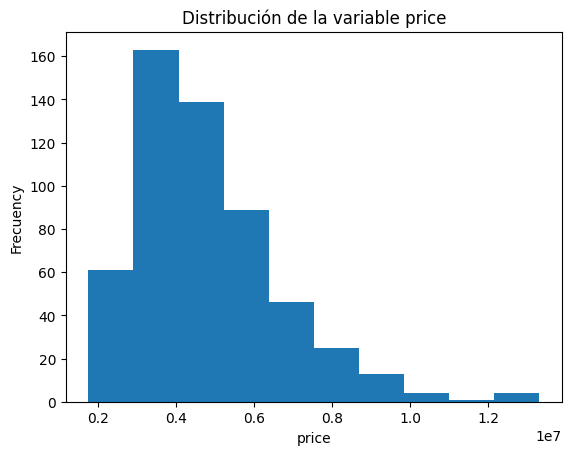

In [11]:
plt.hist(housing['price']) # Se determinar un histograma a realizar y se pasan los datos

plt.xlabel('price') # Se especifica el nombre de la eje x
plt.ylabel('Frecuency') # Se especifica el nombre de la eje y
plt.title('Distribución de la variable price') # Se especifica el título de la gráfica
plt.show();


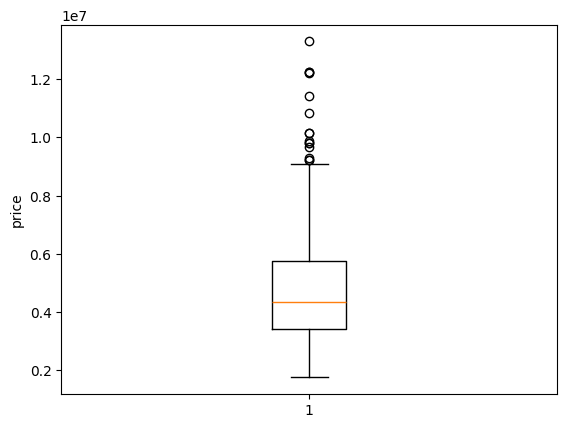

In [ ]:
plt.boxplot(housing['price']) # Se muestra la gráfica cajas y bigotes y se pasan los datos

plt.ylabel('price') # Se especifica el nombre de la eje y, en este caso

plt.show();

<Axes: xlabel='price', ylabel='furnishingstatus'>

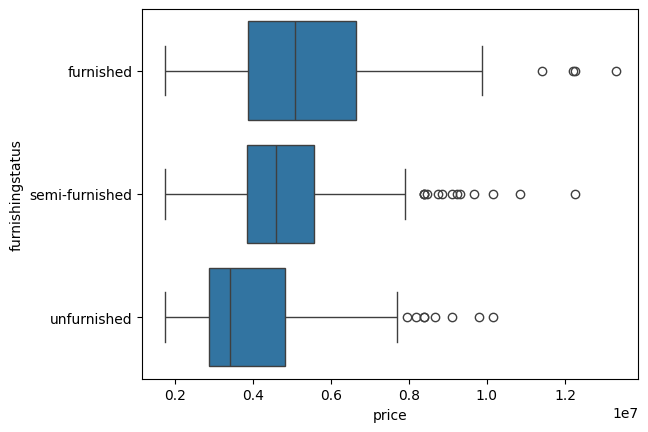

In [13]:
sns.boxplot( x= housing["price"], y= housing['furnishingstatus'])

Text(0, 0.5, 'Habitaciones')

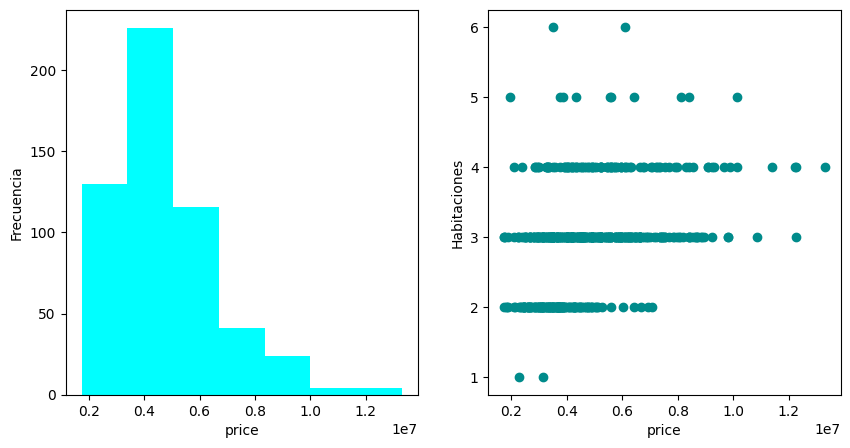

In [27]:
fig, axes= plt.subplots(1, 2, figsize= (10, 5))

axes[0].hist(housing['price'],
             bins= 7,
             color= 'aqua'
             );
axes[0].set_xlabel('price')
axes[0].set_ylabel('Frecuencia')

axes[1].scatter(housing['price'],
                housing['bedrooms'],
                marker= 'o',
                color= 'darkcyan'
                );
axes[1].set_xlabel('price')
axes[1].set_ylabel('Habitaciones')


Text(0.5, 1.0, 'Precio promedio por tipo de amoblado')

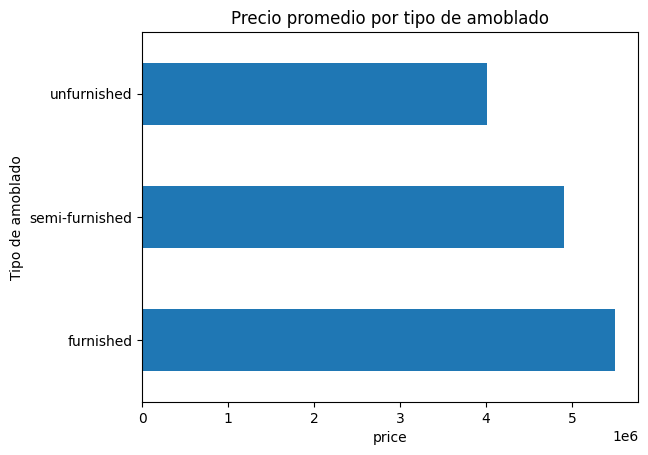

In [29]:
housing.groupby('furnishingstatus')['price'].mean().plot(kind= 'barh')
plt.xlabel('price')
plt.ylabel('Tipo de amoblado')
plt.title('Precio promedio por tipo de amoblado')

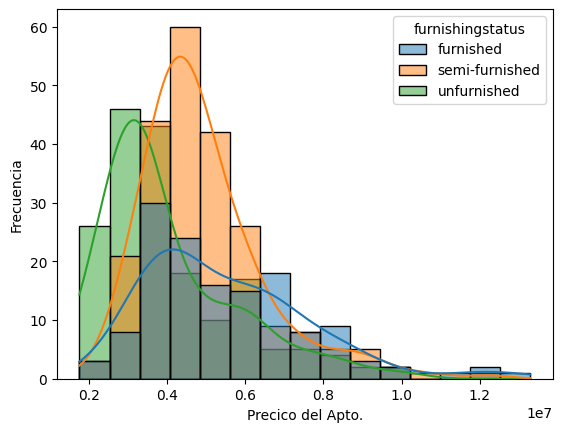

In [39]:
sns.histplot(data= housing,
             x= 'price',
             kde= True,
             color= 'darkcyan',
             hue= 'furnishingstatus',
             bins= 15
             );
plt.xlabel('Precico del Apto.')
plt.ylabel('Frecuencia');





In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Ejercicio 1

De acuerdo con la descripción del DataSet housing, realice:

1. Describa paso por paso lo que hace la siguiente sentencia.
2. Usted ha construido esta sentencia para un cliente. Haga una lista de todas las condiciones que este cliente potencial le ha dado a usted para encontrar las propiedades que se ajustan a su demanda.

In [ ]:
(housing
 .loc[(housing['basement'] == 'yes') &
      (housing['prefarea'] == 'yes') &
      (housing['furnishingstatus'] == 'furnished'),
      ['area','price','bedrooms']]
 .sort_values(by = 'area', ascending = False)
 .head(3))

## Ejercicio 2

Lea el DataSet y almacénelo en un DataFrame llamado housing y luego de solución a los siguientes requerimientos:

1. Agrupar por número de habitaciones (bedrooms), filtra la variable precio (price), calcula la media del precio para cada grupo
2. Obtener la media para todas las variables, de acuerdo al número de habitaciones (bedrooms)
3. Obtener para cada número de habitación (bedrooms) el mínimo y el máximo valor del área (area) y la media del precio (price) y su mediana.
4. Obtener el promedio del precio (price) conforme a: amoblado (furnishingstatus) y al barrio o zona privilegiada (prefarea)
5. Mostrar la estadística descriptiva de las variables: amoblado (furnishingstatus) y al barrio o zona privilegiada (prefarea) filtrando por el precio
6. Realice un ordenamiento por precio (price) de manera ascendente y muestre las primeras 20 observaciones
7. Cree una columna llamada precio_por_area, con la siguiente fórmula: precio/area